In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,plot_roc_curve
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


### Importing the dataset

In [6]:
#Reading the DataSet
df = pd.read_csv('C:/Users/LENOVO/Downloads/COVID19-Probability-Symptoms-Checker-master111/COVID19-Probability-Symptoms-Checker-master/COVID-19/covid_final_data.csv')

### Importing the packages

### Dataset Attributes


In [7]:
df.columns

Index(['AGE', 'GENDER', 'FEVER', 'COUGH', 'FATIGUE', 'PAINS',
       'NASAL_CONGESTION', 'SHORTNESS_OF_BREATH', 'RUNNY_NOSE', 'SORE THROAT',
       'DIARRHEA', 'CHILLS', 'HEADACHE', 'VOMITING', 'LIVES_IN_AFFECTED_AREA',
       'COVID_OUTPUT'],
      dtype='object')

**Patient's Attribute**

```
1. Age: Patient's Age
2. Gender: Male(1) or Female (0)
3. Fever: Yes(1) or No(0)
4. Cough: Yes(1) or No(0)
5. Fatigue: Yes(1) or No(0)
6. Pains: Yes(1) or No(0)
7. Nasal Congestion: Yes(1) or No(0)
8. Shortness of Breath: Yes(1) or No(0)
9. Runny Nose: Yes(1) or No(0)
10. Sore Throat: Yes(1) or No(0)
11. Diarrhea: Yes(1) or No(0)
12. Chills: Yes(1) or No(0)
13. Headache: Yes(1) or No(0)
14. Vomiting: Yes(1) or No(0)
15. Lives in affected area: Yes(1) or No(0)
---------------------------------------------
16. Covid Output: Yes(1) or No(0)
```

In [8]:
df.head(10)

,AGE,GENDER,FEVER,COUGH,FATIGUE,PAINS,NASAL_CONGESTION,SHORTNESS_OF_BREATH,RUNNY_NOSE,SORE THROAT,DIARRHEA,CHILLS,HEADACHE,VOMITING,LIVES_IN_AFFECTED_AREA,COVID_OUTPUT
0,19,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1
1,28,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1
2,35,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
3,33,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,33,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
5,87,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
6,55,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
7,60,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
8,66,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1
9,57,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1


### Correlation Matrix

In [9]:
corrMatrix = df.corr(method='spearman')
df.corr()

,AGE,GENDER,FEVER,COUGH,FATIGUE,PAINS,NASAL_CONGESTION,SHORTNESS_OF_BREATH,RUNNY_NOSE,SORE THROAT,DIARRHEA,CHILLS,HEADACHE,VOMITING,LIVES_IN_AFFECTED_AREA,COVID_OUTPUT
AGE,1.000000,0.074382,0.022943,0.047645,0.097993,0.081185,0.130204,-0.031658,-0.021785,-0.105755,-0.048191,0.023023,0.016395,0.022586,-0.000310,0.006081
GENDER,0.074382,1.000000,0.053795,0.003112,-0.048996,-0.010474,0.011494,-0.016308,-0.052529,-0.062823,0.017050,-0.014599,-0.022730,0.025970,0.212699,0.013788
FEVER,0.022943,0.053795,1.000000,0.191755,-0.005902,0.060148,0.004159,-0.123018,0.010423,0.001083,0.009738,-0.017796,-0.068020,-0.020995,0.187202,0.529185
COUGH,0.047645,0.003112,0.191755,1.000000,-0.027305,0.052422,0.070611,-0.080566,0.029718,0.019849,0.020887,-0.030242,0.056511,0.014351,-0.030356,0.218632
FATIGUE,0.097993,-0.048996,-0.005902,-0.027305,1.000000,0.015797,-0.007595,-0.045449,-0.029837,0.010381,0.037218,0.033071,0.007328,0.008849,-0.016685,0.070014
PAINS,0.081185,-0.010474,0.060148,0.052422,0.015797,1.000000,0.040673,0.014355,0.031633,-0.009506,0.023900,-0.034958,-0.030098,-0.005686,-0.037240,0.057166
NASAL_CONGESTION,0.130204,0.011494,0.004159,0.070611,-0.007595,0.040673,1.000000,-0.042787,-0.043125,-0.040672,0.042957,0.020311,-0.048444,-0.009234,0.066466,0.077812
SHORTNESS_OF_BREATH,-0.031658,-0.016308,-0.123018,-0.080566,-0.045449,0.014355,-0.042787,1.000000,-0.046551,-0.047411,-0.009285,-0.022450,-0.093514,-0.034236,0.024829,0.016807
RUNNY_NOSE,-0.021785,-0.052529,0.010423,0.029718,-0.029837,0.031633,-0.043125,-0.046551,1.000000,0.062148,0.146668,-0.040708,-0.005887,0.007113,-0.017605,0.013413
SORE THROAT,-0.105755,-0.062823,0.001083,0.019849,0.010381,-0.009506,-0.040672,-0.047411,0.062148,1.000000,0.015141,0.064801,0.052343,0.065870,-0.030366,-0.008681


### Visual Representation of Correlation Matrix

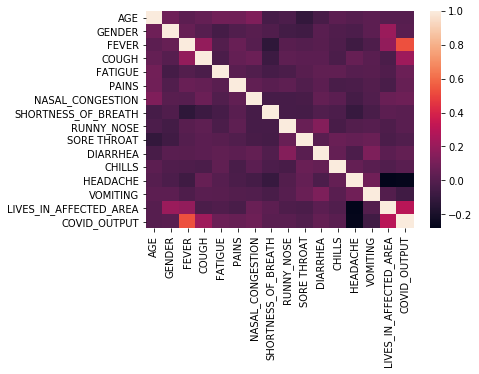

In [10]:
sns.heatmap(corrMatrix)
plt.rcParams["figure.figsize"] = [10,10]
plt.show()

### Visual Analysis of Common Symptoms

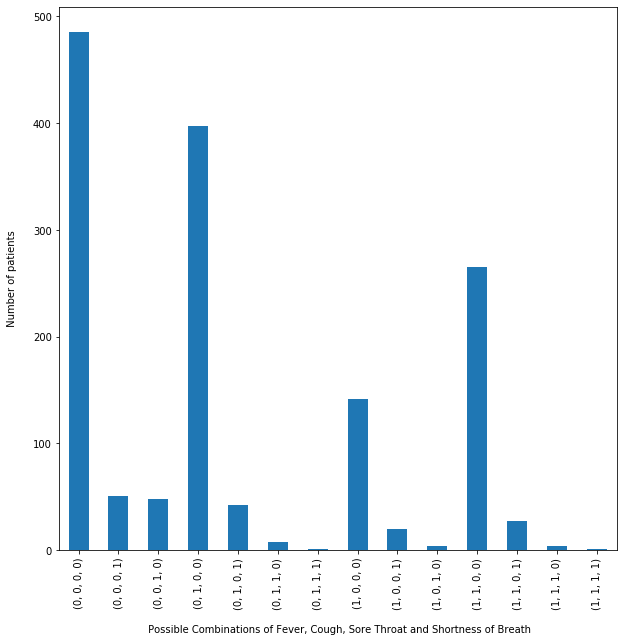

In [11]:
plt.clf()
plt.rcParams["figure.figsize"] = [15,5]
df.groupby(['COUGH','FEVER','SHORTNESS_OF_BREATH','SORE THROAT']).size().plot(kind='bar')
plt.xlabel("\n Possible Combinations of Fever, Cough, Sore Throat and Shortness of Breath")
plt.ylabel(" Number of patients \n")
plt.show()

#### Seperating the features and independent variables

In [12]:
X = df.iloc[:,0:15].values
y = df.iloc[:,15].values

#### Spliting the dataset into test and train

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

#### Creating Different Models

In [14]:
rfc = RandomForestClassifier(n_estimators=15,random_state=42)
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
gnb = GaussianNB()
svr = LinearSVC(random_state=42)
#nn = MLPClassifier(random_state=42)
#---------------------------
lr.fit(X_train,y_train)
rfc.fit(X_train,y_train)
dt.fit(X_train,y_train)
svr.fit(X_train,y_train)
gnb.fit(X_train,y_train)


GaussianNB()

### Area Under Curve Analysis

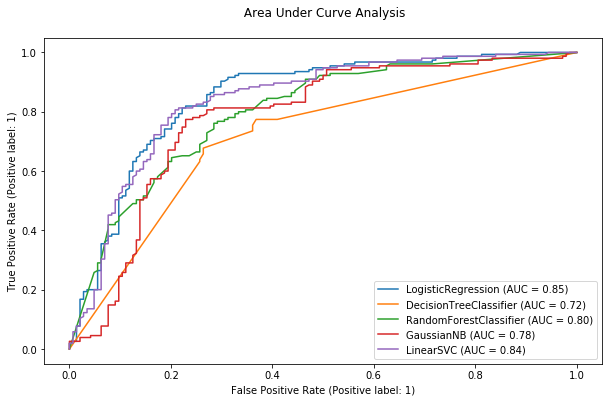

In [15]:
plt.rcParams["figure.figsize"] = [10,6]
disp = plot_roc_curve(lr,X_test,y_test)
plt.title(' Area Under Curve Analysis\n')
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gnb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svr,X_test,y_test,ax=disp.ax_)


#### Discussions:

As LogisticRegression is having high AUC values among all the algorithms, we'll work with LR to make the predictions for the COVID-19 Infection Probability.

**_data_input_**: List holding the values of the given symptoms and patient's attributes.

##### Case 1: Considering a male patient of 32years of age and having no symptoms at all

In [17]:
data_input = [32,1,0,0,0,0,0,0,0,0,0,0,0,0,0] #Age:22, Gender: 1(Male) and so on..
result = (lr.predict_proba([data_input]))
result = round(result[0][1]*100,2)
print(f"COVID19 Infection Probability: {result}%")

COVID19 Infection Probability: 13.24%


##### Case 2: Considering a female patient of 67years of age and having fever,headache,cough,lives in affected area

In [18]:
data_input = [67,0,1,1,0,0,0,0,0,0,0,0,1,0,1] #Age:67, Gender: 0(Female) and so on..
result = (lr.predict_proba([data_input]))
result = round(result[0][1]*100,2)
print(f"COVID19 Infection Probability: {result}%")

COVID19 Infection Probability: 78.32%


&nbsp;

<div align="center" style="margin-left:-100px;"><b>Stay Home, Stay Safe 🙏🏻</b></div>